# Earth's Orbit - SOLUTION

In the previous notebook we just guessed at the initial conditions, and we get a very elliptical orbit.

Now we want to simulate Earth's orbit, so we need to care about the initial conditions.

Using the formula for acceleration on a circle

$$v^2/r = G~M/r^2$$

So the velocity on a circular orbit should be

$$v = \sqrt{G~M/r}$$

Remembering our scale factor, this becomes

$$v = \sqrt{\frac{G~M T^2}{R^3} \frac{1}{\rho}}$$


We can use that to get the initial conditions correct.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# In addition to the imports, we'll also import some constants
# And also define our own
# NOTE: All units in SI
from scipy.constants import gravitational_constant, au

year = 365.25*24*3600 # seconds

mass_sun = 1.989e30 # kg

earth_distance = 1.496e11 # meters
# The Earth distance is also defined as 1 AU
mars_distance = 227.9*1.e9 # meters
jupiter_distance = 778.57*1.e9 # meters

## Define your function from before

Please paste your `grav_derivs` function from before into here

In [2]:
scale_factor = gravitational_constant * mass_sun * year ** 2 / au ** 3

In [3]:
# Gravitational acceleration in 2D

def grav_derivs(state, t):
    x, y, vx, vy = state
    
    r =  (x ** 2 + y ** 2) ** 0.5 # Calculate the distance from x and y
    acc =  - scale_factor / r ** 2 # Calculate the magnitude of the acceleration
    acc_x =  acc * x / r # Calculate the vector components of the acceleration
    acc_y =  acc * y / r # Calculate the vector components of the acceleration
    
    return (vx, vy, acc_x, acc_y)

## Exercise

Fill in the initial condition below to get a circular orbit at $r = 1$.

In [4]:
r_init2 = (1., 0., 0., np.sqrt(scale_factor)) # FIXME: Change the last value
times = np.linspace(0., 10, 10000)
rarr2 = odeint(grav_derivs, r_init2, times)

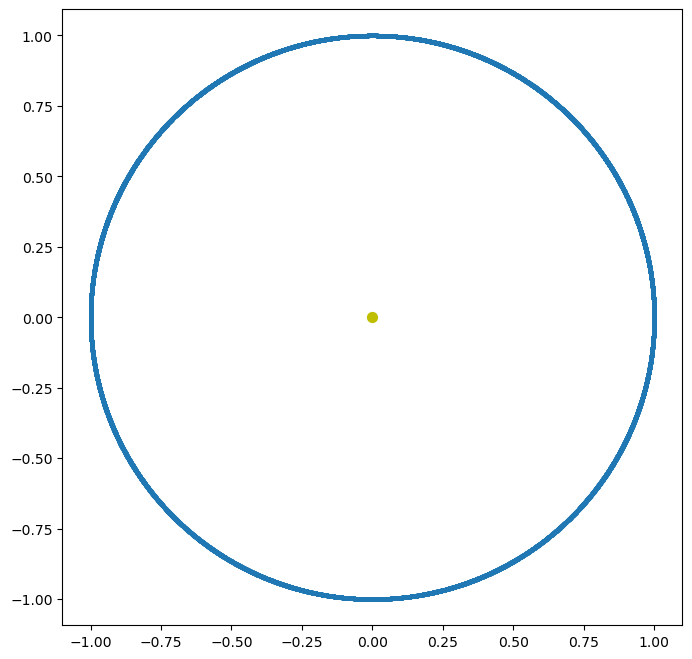

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(rarr2[:,0], rarr2[:,1], s=5)
plt.scatter(0., 0., c='y', s=50)
plt.gca().set_aspect('equal', 'datalim')

## Exercise

Find how long a single orbit takes. Does the answer make sense?

To do this, we can play around with the duration of the simulation and checking that the simulation ends at the start point

You should get `times = np.linspace(0., 1, 1000)` in your answer - basically anything that ends at 1 year
This makes sense, as the object at 1AU from the sun (i.e. earth), will take a year to orbit

We could also plot the results on a graph to see the periodicity of the solution, as done in the cell below

End position: (np.float64(0.9999592888910954), np.float64(0.008370180901490519))


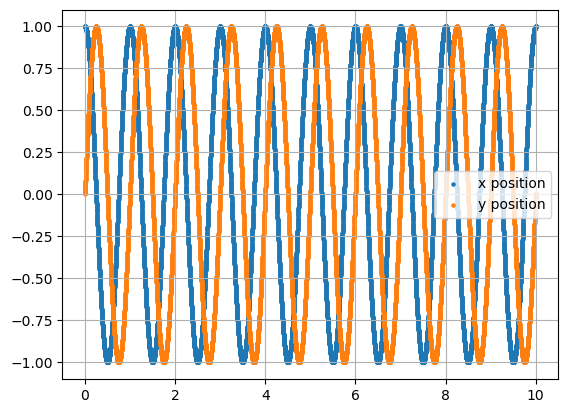

In [11]:
print("End position:", (rarr2[-1,0], rarr2[-1,1]))
plt.figure()
plt.scatter(times, rarr2[:,0], s=5, label='x position')
plt.scatter(times, rarr2[:,1], s=5, label='y position')
plt.grid()
plt.legend()

## Exercise

Play with the conditions below, shooting the planet toward the sun but offset a bit in $y$ so it doesn't go straight through the center. What kind of shapes do you get? Note that we use a different `times` array than the others, so orbits that go way off can be stopped early if you want.

You should generally get hyperbolic orbits, unless you go slow enough to get trapped in an orbit

In [36]:
r_init3 = (4., 0.5, -5., 0.) # FIXME: Try different values
times3 = np.linspace(0., 0.001, 100)
rarr3 = odeint(grav_derivs, r_init3, times)

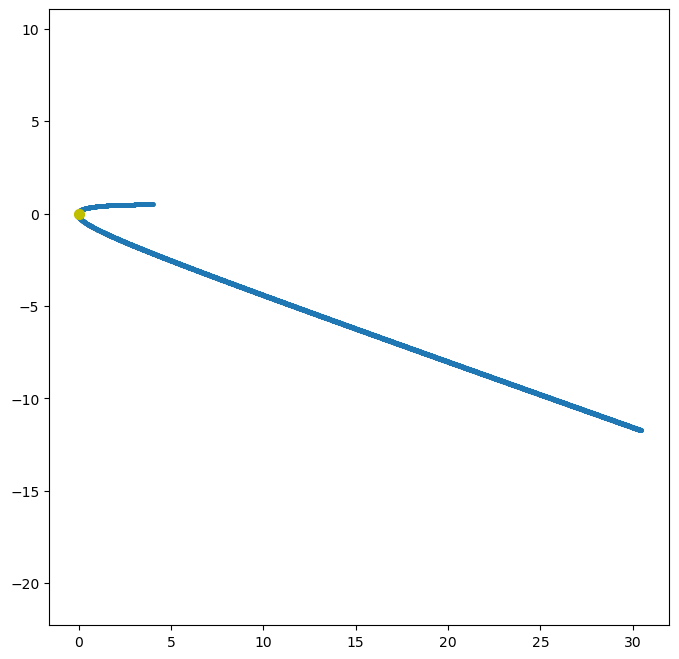

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(rarr3[:,0], rarr3[:,1], s=5)
plt.scatter(0., 0., c='y', s=50) # The sun
plt.gca().set_aspect('equal', 'datalim')

## Exercise

I've defined the distance from Mars to the Sun in kilometers as `mars_distance`. Define `r_mars` in our units (the ones where the Earth is at $r = 1$, and change the initial conditions below to simulate Mars rather than Earth.

In [17]:
r_mars = mars_distance / earth_distance

r_init4 = (r_mars, 0., 0., (scale_factor / r_mars) ** 0.5)
rarr4 = odeint(grav_derivs, r_init4, times)

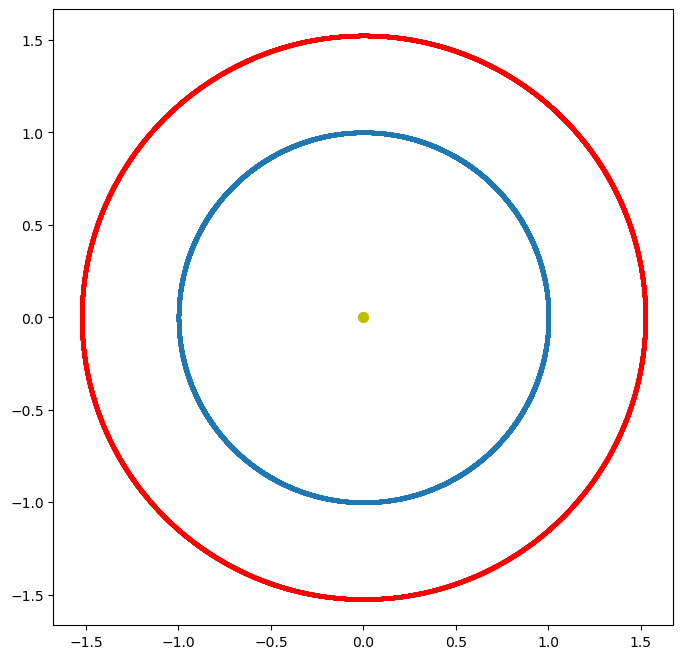

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(rarr2[:,0], rarr2[:,1], s=5)
plt.scatter(rarr4[:,0], rarr4[:,1], c='r', s=4)
plt.scatter(0., 0., c='y', s=50) # The sun
plt.gca().set_aspect('equal', 'datalim')